In [46]:
# importing libs
import pandas as pd
import re

### Loading datasets
###### In this project, we (Daniel Gyebnar and Salga Benjamin) want to analyze how governmental spending on schools affects the performance of the students. The main goal is to merge 3 datasets (education expenditure, Times data, country codes) and make an analysis of them to find answers to our question.

In [48]:
# loading the education expenditure
url1="https://raw.githubusercontent.com/DaniDataScience/Python_coding_3/main/education_expenditure.csv"
edu_exp=pd.read_csv('education_expenditure.csv')
edu_exp.head()

country     institute_type direct_expenditure_type  1995  2000  2005  \
0  OECD Average  All Institutions                   Public   4.9   4.9   5.0   
1     Australia  All Institutions                   Public   4.5   4.6   4.3   
2       Austria  All Institutions                   Public   5.3   5.4   5.2   
3       Belgium  All Institutions                   Public   5.0   5.1   5.8   
4        Canada  All Institutions                   Public   5.8   5.2   4.8   

   2009  2010  2011  
0   5.4   5.4   5.3  
1   4.5   4.6   4.3  
2   5.7   5.6   5.5  
3   6.4   6.4   6.4  
4   5.0   5.2   NaN

In [49]:
# loading the Times data set
times_data=pd.read_csv("https://raw.githubusercontent.com/DaniDataScience/Python_coding_3/main/times_Data_er.csv")
times_data.head()

world_rank                        university_name        country  teaching  \
0           1                     Harvard University  United States      99.7   
1           2     California Institute of Technology  United States      97.7   
2           3  Massachusetts Institute of Technology  United States      97.8   
3           4                    Stanford University  United States      98.3   
4           5                   Princeton University  United States      90.9   

   international  research  citations  income  total_score  num_students  \
0           72.4      98.7       98.8    34.5         96.1       20152.0   
1           54.6      98.0       99.9    83.7         96.0        2243.0   
2           82.3      91.4       99.9    87.5         95.6       11074.0   
3           29.5      98.1       99.2    64.3         94.3       15596.0   
4           70.3      95.4       99.9     NaN         94.2        7929.0   

   student_staff_ratio international_students female_male_ratio  year  
0                  8.9                    25%               NaN  2011  
1                  6.9                    27%             33;67  2011  
2                  9.0                    33%             37;63  2011  
3                  7.8                    22%              1.79  2011  
4                  8.4                    27%              1.91  2011

In [50]:
# loading country codes
url3='https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv'
codes=pd.read_csv(url3)
codes.head()

Country Alpha-2 code Alpha-3 code Numeric code Latitude (average)  \
0     Afghanistan         "AF"        "AFG"          "4"               "33"   
1         Albania         "AL"        "ALB"          "8"               "41"   
2         Algeria         "DZ"        "DZA"         "12"               "28"   
3  American Samoa         "AS"        "ASM"         "16"         "-14.3333"   
4         Andorra         "AD"        "AND"         "20"             "42.5"   

  Longitude (average)  
0                "65"  
1                "20"  
2                 "3"  
3              "-170"  
4               "1.6"

### Cleaning Times data set

#### First we identify NAs and dropping them

In [51]:
times_data.isna().sum(axis=0)

world_rank                   0
university_name              0
country                      0
teaching                     0
international                9
research                     0
citations                    0
income                     218
total_score               1402
num_students                59
student_staff_ratio         59
international_students      67
female_male_ratio          236
year                         0
dtype: int64

In [52]:
times_data = times_data.dropna()
times_data.isna().sum(axis=0)

world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
female_male_ratio         0
year                      0
dtype: int64

In [53]:
len(times_data)

954

#### checking dta dypes. columns with objects as type probably need cleaning

In [54]:
times_data.dtypes

world_rank                  int64
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score               float64
num_students              float64
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

#### cleaning international col

In [55]:
times_data["international_students"]  = times_data["international_students"].apply(lambda x: re.sub('%','',x))


In [56]:
times_data["international_students"] = pd.to_numeric(times_data["international_students"])

#### cleaning female_male_ratio col

columns "female_male_ratio" has two types of value, one ratio with ";" (e.g.60;40) and one with in integer (e.g. 1.5)

In [57]:
# marking True-False for splitting dataframe
times_data["female__ratio"] = times_data["female_male_ratio"].apply(
    lambda x: 
        x[0:2]
        if ";" in x else
        round((float(x)/(1+float(x)))*100)
)

times_data.drop(["female_male_ratio"], axis='columns', inplace=True)

#### cleaning university name and country col

In [58]:
times_data['university_name'] = times_data['university_name'].astype("string")
times_data['country'] = times_data['country'].astype("string")
times_data['female__ratio'] = times_data['female__ratio'].astype("int64")
#times_data['international_students'] = times_data['international_students'].astype("int")

times_data.dtypes

world_rank                  int64
university_name            string
country                    string
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score               float64
num_students              float64
student_staff_ratio       float64
international_students      int64
year                        int64
female__ratio               int64
dtype: object

### Cleaning the Educational expendutire table

In [59]:
edu_exp.head()

country     institute_type direct_expenditure_type  1995  2000  2005  \
0  OECD Average  All Institutions                   Public   4.9   4.9   5.0   
1     Australia  All Institutions                   Public   4.5   4.6   4.3   
2       Austria  All Institutions                   Public   5.3   5.4   5.2   
3       Belgium  All Institutions                   Public   5.0   5.1   5.8   
4        Canada  All Institutions                   Public   5.8   5.2   4.8   

   2009  2010  2011  
0   5.4   5.4   5.3  
1   4.5   4.6   4.3  
2   5.7   5.6   5.5  
3   6.4   6.4   6.4  
4   5.0   5.2   NaN

In [60]:
edu_exp.isna().sum(axis=0)

country                      0
institute_type               0
direct_expenditure_type      0
1995                       239
2000                       234
2005                       227
2009                       230
2010                       232
2011                        51
dtype: int64

In [61]:
edu_exp = edu_exp.dropna()
edu_exp.isna().sum(axis=0)

country                    0
institute_type             0
direct_expenditure_type    0
1995                       0
2000                       0
2005                       0
2009                       0
2010                       0
2011                       0
dtype: int64

We only need higher educational instistutions, we drop the rest

In [62]:
edu_exp["institute_type"].value_counts()

All Institutions                          27
Elementary and Secondary Institutions     26
Higher Education Institutions             26
Name: institute_type, dtype: int64

In [63]:
edu_exp = edu_exp[edu_exp["institute_type"].str.contains("Higher")]

In [64]:
edu_exp["direct_expenditure_type"].value_counts()

Public    26
Name: direct_expenditure_type, dtype: int64

In [65]:
edu_exp['country'] = edu_exp['country'].astype("string")
edu_exp['institute_type'] = edu_exp['institute_type'].astype("string")
edu_exp['direct_expenditure_type'] = edu_exp['direct_expenditure_type'].astype("string")

edu_exp.dtypes

country                     string
institute_type              string
direct_expenditure_type     string
1995                       float64
2000                       float64
2005                       float64
2009                       float64
2010                       float64
2011                       float64
dtype: object

#### Merging the two tables

In [66]:
merged_df = pd.merge(times_data, edu_exp, how='left', left_on="country", right_on="country")
merged_df = merged_df.dropna()
merged_df.isna().sum(axis=0)

print((len(times_data),len(edu_exp),len(merged_df)))
merged_df.head()

(954, 26, 763)


world_rank                        university_name         country  \
0           2     California Institute of Technology   United States   
1           3  Massachusetts Institute of Technology   United States   
2           4                    Stanford University   United States   
3           6                University of Cambridge  United Kingdom   
4           6                   University of Oxford  United Kingdom   

   teaching  international  research  citations  income  total_score  \
0      97.7           54.6      98.0       99.9    83.7         96.0   
1      97.8           82.3      91.4       99.9    87.5         95.6   
2      98.3           29.5      98.1       99.2    64.3         94.3   
3      90.5           77.7      94.1       94.0    57.0         91.2   
4      88.2           77.2      93.9       95.1    73.5         91.2   

   num_students  ...  year  female__ratio                  institute_type  \
0        2243.0  ...  2011             33  Higher Education Institutions    
1       11074.0  ...  2011             37  Higher Education Institutions    
2       15596.0  ...  2011             64  Higher Education Institutions    
3       18812.0  ...  2011             66  Higher Education Institutions    
4       19919.0  ...  2011             66  Higher Education Institutions    

   direct_expenditure_type 1995 2000  2005  2009  2010  2011  
0                   Public  1.1  0.8   1.0   1.1   1.0   0.9  
1                   Public  1.1  0.8   1.0   1.1   1.0   0.9  
2                   Public  1.1  0.8   1.0   1.1   1.0   0.9  
3                   Public  0.7  0.7   0.9   0.6   0.7   0.9  
4                   Public  0.7  0.7   0.9   0.6   0.7   0.9  

[5 rows x 22 columns]

#### Cleaning the country codes table

In [67]:
codes.dtypes

Country                object
Alpha-2 code           object
Alpha-3 code           object
Numeric code           object
Latitude (average)     object
Longitude (average)    object
dtype: object

In [68]:
codes['Country'] = codes['Country'].astype("string")
codes['Alpha-2 code'] = codes['Alpha-2 code'].apply(lambda x: re.sub('"','',x))
codes['Alpha-2 code'] = codes['Alpha-2 code'].apply(lambda x: re.sub(' ','',x))
codes['Alpha-3 code'] = codes['Alpha-3 code'].astype("string")

In [69]:
df = pd.merge(merged_df, codes[["Country", "Alpha-2 code"]], how='left', left_on='country',  right_on='Country').drop(columns=["Country"])
df.head()

world_rank                        university_name         country  \
0           2     California Institute of Technology   United States   
1           3  Massachusetts Institute of Technology   United States   
2           4                    Stanford University   United States   
3           6                University of Cambridge  United Kingdom   
4           6                   University of Oxford  United Kingdom   

   teaching  international  research  citations  income  total_score  \
0      97.7           54.6      98.0       99.9    83.7         96.0   
1      97.8           82.3      91.4       99.9    87.5         95.6   
2      98.3           29.5      98.1       99.2    64.3         94.3   
3      90.5           77.7      94.1       94.0    57.0         91.2   
4      88.2           77.2      93.9       95.1    73.5         91.2   

   num_students  ...  female__ratio                  institute_type  \
0        2243.0  ...             33  Higher Education Institutions    
1       11074.0  ...             37  Higher Education Institutions    
2       15596.0  ...             64  Higher Education Institutions    
3       18812.0  ...             66  Higher Education Institutions    
4       19919.0  ...             66  Higher Education Institutions    

   direct_expenditure_type  1995 2000 2005  2009  2010  2011  Alpha-2 code  
0                   Public   1.1  0.8  1.0   1.1   1.0   0.9            US  
1                   Public   1.1  0.8  1.0   1.1   1.0   0.9            US  
2                   Public   1.1  0.8  1.0   1.1   1.0   0.9            US  
3                   Public   0.7  0.7  0.9   0.6   0.7   0.9            GB  
4                   Public   0.7  0.7  0.9   0.6   0.7   0.9            GB  

[5 rows x 23 columns]

#### Getting RND data for each country

In [70]:
codes = list(set(df["Alpha-2 code"]))
codes

['JP',
 'ES',
 'FR',
 'NO',
 'AU',
 'NZ',
 'SE',
 'DK',
 'NL',
 'IT',
 'US',
 'AT',
 'GB',
 'FI',
 'CH',
 'BE']

In [71]:
import json
import requests

# Research and development expenditure (% of GDP) - United Kingdom
# https://data.worldbank.org/indicator/GB.XPD.RSDV.GD.ZS?locations=GB&view=chart

resp = requests.get("http://api.worldbank.org/v2/country/GB/indicator/GB.XPD.RSDV.GD.ZS?format=json&date=2011")
rnd = json.loads(resp.text)[1][0]
rnd["value"]

1.64959

In [73]:
rnd_dict = {}
years = ["2008","2009","2010","2011","2012","2013","2014"]
year=2011

for code in codes:
    temp = []
    for year in years:
        resp = requests.get("http://api.worldbank.org/v2/country/"+code+"/indicator/GB.XPD.RSDV.GD.ZS?format=json&date="+str(year))
        temp.append(json.loads(resp.text)[1][0]["value"])
    rnd_dict[code]=temp
rnd_dict

{'JP': [3.33718, 3.2314, 3.13708, 3.24477, 3.20908, 3.31496, 3.40022],
 'ES': [1.325, 1.36364, 1.35996, 1.33341, 1.29877, 1.27523, 1.24213],
 'FR': [2.06117, 2.21207, 2.17857, 2.19161, 2.22707, 2.23703, 2.27592],
 'NO': [1.55448, 1.72472, 1.64999, 1.62712, 1.62087, 1.65238, 1.71506],
 'AU': [2.4037, None, 2.37586, 2.23765, None, 2.1787, None],
 'NZ': [None, 1.2523, None, 1.23065, None, 1.15375, None],
 'SE': [3.46999, 3.39528, 3.16789, 3.18702, 3.23025, 3.26042, 3.10184],
 'DK': [2.77346, 3.05514, 2.91707, 2.94465, 2.98125, 2.97048, 2.91409],
 'NL': [1.62269, 1.6657, 1.70404, 1.88131, 1.91627, 1.92987, 1.97568],
 'IT': [1.15972, 1.21787, 1.21797, 1.20155, 1.26219, 1.30107, 1.3384],
 'US': [2.76791, 2.8127, 2.7354, 2.76525, 2.68166, 2.70972, 2.71924],
 'AT': [2.56945, 2.59674, 2.7261, 2.66868, 2.91472, 2.95492, 3.08429],
 'GB': [1.61272, 1.67125, 1.64564, 1.64959, 1.57716, 1.62028, 1.6434],
 'FI': [3.53697, 3.73402, 3.70532, 3.61806, 3.39832, 3.27137, 3.14751],
 'CH': [2.71472, None, No

In [74]:
years = ["2008","2009","2010","2011","2012","2013","2014"]
rnd_data = pd.DataFrame.from_dict(rnd_dict, orient='index', columns=years)
rnd_data["Country"] = codes
rnd_data

2008     2009     2010     2011     2012     2013     2014 Country
JP  3.33718  3.23140  3.13708  3.24477  3.20908  3.31496  3.40022      JP
ES  1.32500  1.36364  1.35996  1.33341  1.29877  1.27523  1.24213      ES
FR  2.06117  2.21207  2.17857  2.19161  2.22707  2.23703  2.27592      FR
NO  1.55448  1.72472  1.64999  1.62712  1.62087  1.65238  1.71506      NO
AU  2.40370      NaN  2.37586  2.23765      NaN  2.17870      NaN      AU
NZ      NaN  1.25230      NaN  1.23065      NaN  1.15375      NaN      NZ
SE  3.46999  3.39528  3.16789  3.18702  3.23025  3.26042  3.10184      SE
DK  2.77346  3.05514  2.91707  2.94465  2.98125  2.97048  2.91409      DK
NL  1.62269  1.66570  1.70404  1.88131  1.91627  1.92987  1.97568      NL
IT  1.15972  1.21787  1.21797  1.20155  1.26219  1.30107  1.33840      IT
US  2.76791  2.81270  2.73540  2.76525  2.68166  2.70972  2.71924      US
AT  2.56945  2.59674  2.72610  2.66868  2.91472  2.95492  3.08429      AT
GB  1.61272  1.67125  1.64564  1.64959  1.57716  1.62028  1.64340      GB
FI  3.53697  3.73402  3.70532  3.61806  3.39832  3.27137  3.14751      FI
CH  2.71472      NaN      NaN      NaN  3.18623      NaN      NaN      CH
BE  1.93684  1.99860  2.06188  2.17332  2.28114  2.33073  2.37002      BE

we take the average of 2011 and 2012 to have values for all countries

In [75]:
rnd_data["rnd_2011-11_avg"] = rnd_data[["2011","2012"]].mean(skipna=True, axis=1)
rnd_data[["Country", "rnd_2011-11_avg"]]

Country  rnd_2011-11_avg
JP      JP         3.226925
ES      ES         1.316090
FR      FR         2.209340
NO      NO         1.623995
AU      AU         2.237650
NZ      NZ         1.230650
SE      SE         3.208635
DK      DK         2.962950
NL      NL         1.898790
IT      IT         1.231870
US      US         2.723455
AT      AT         2.791700
GB      GB         1.613375
FI      FI         3.508190
CH      CH         3.186230
BE      BE         2.227230

#### Merging

In [76]:
df_final = pd.merge(df, rnd_data[["Country", "rnd_2011-11_avg"]], how='left', left_on='Alpha-2 code',  right_on='Country').drop(columns=["Country"])
df_final.head()

world_rank                        university_name         country  \
0           2     California Institute of Technology   United States   
1           3  Massachusetts Institute of Technology   United States   
2           4                    Stanford University   United States   
3           6                University of Cambridge  United Kingdom   
4           6                   University of Oxford  United Kingdom   

   teaching  international  research  citations  income  total_score  \
0      97.7           54.6      98.0       99.9    83.7         96.0   
1      97.8           82.3      91.4       99.9    87.5         95.6   
2      98.3           29.5      98.1       99.2    64.3         94.3   
3      90.5           77.7      94.1       94.0    57.0         91.2   
4      88.2           77.2      93.9       95.1    73.5         91.2   

   num_students  ...                  institute_type  direct_expenditure_type  \
0        2243.0  ...  Higher Education Institutions                    Public   
1       11074.0  ...  Higher Education Institutions                    Public   
2       15596.0  ...  Higher Education Institutions                    Public   
3       18812.0  ...  Higher Education Institutions                    Public   
4       19919.0  ...  Higher Education Institutions                    Public   

   1995  2000 2005 2009  2010  2011  Alpha-2 code  rnd_2011-11_avg  
0   1.1   0.8  1.0  1.1   1.0   0.9            US         2.723455  
1   1.1   0.8  1.0  1.1   1.0   0.9            US         2.723455  
2   1.1   0.8  1.0  1.1   1.0   0.9            US         2.723455  
3   0.7   0.7  0.9  0.6   0.7   0.9            GB         1.613375  
4   0.7   0.7  0.9  0.6   0.7   0.9            GB         1.613375  

[5 rows x 24 columns]

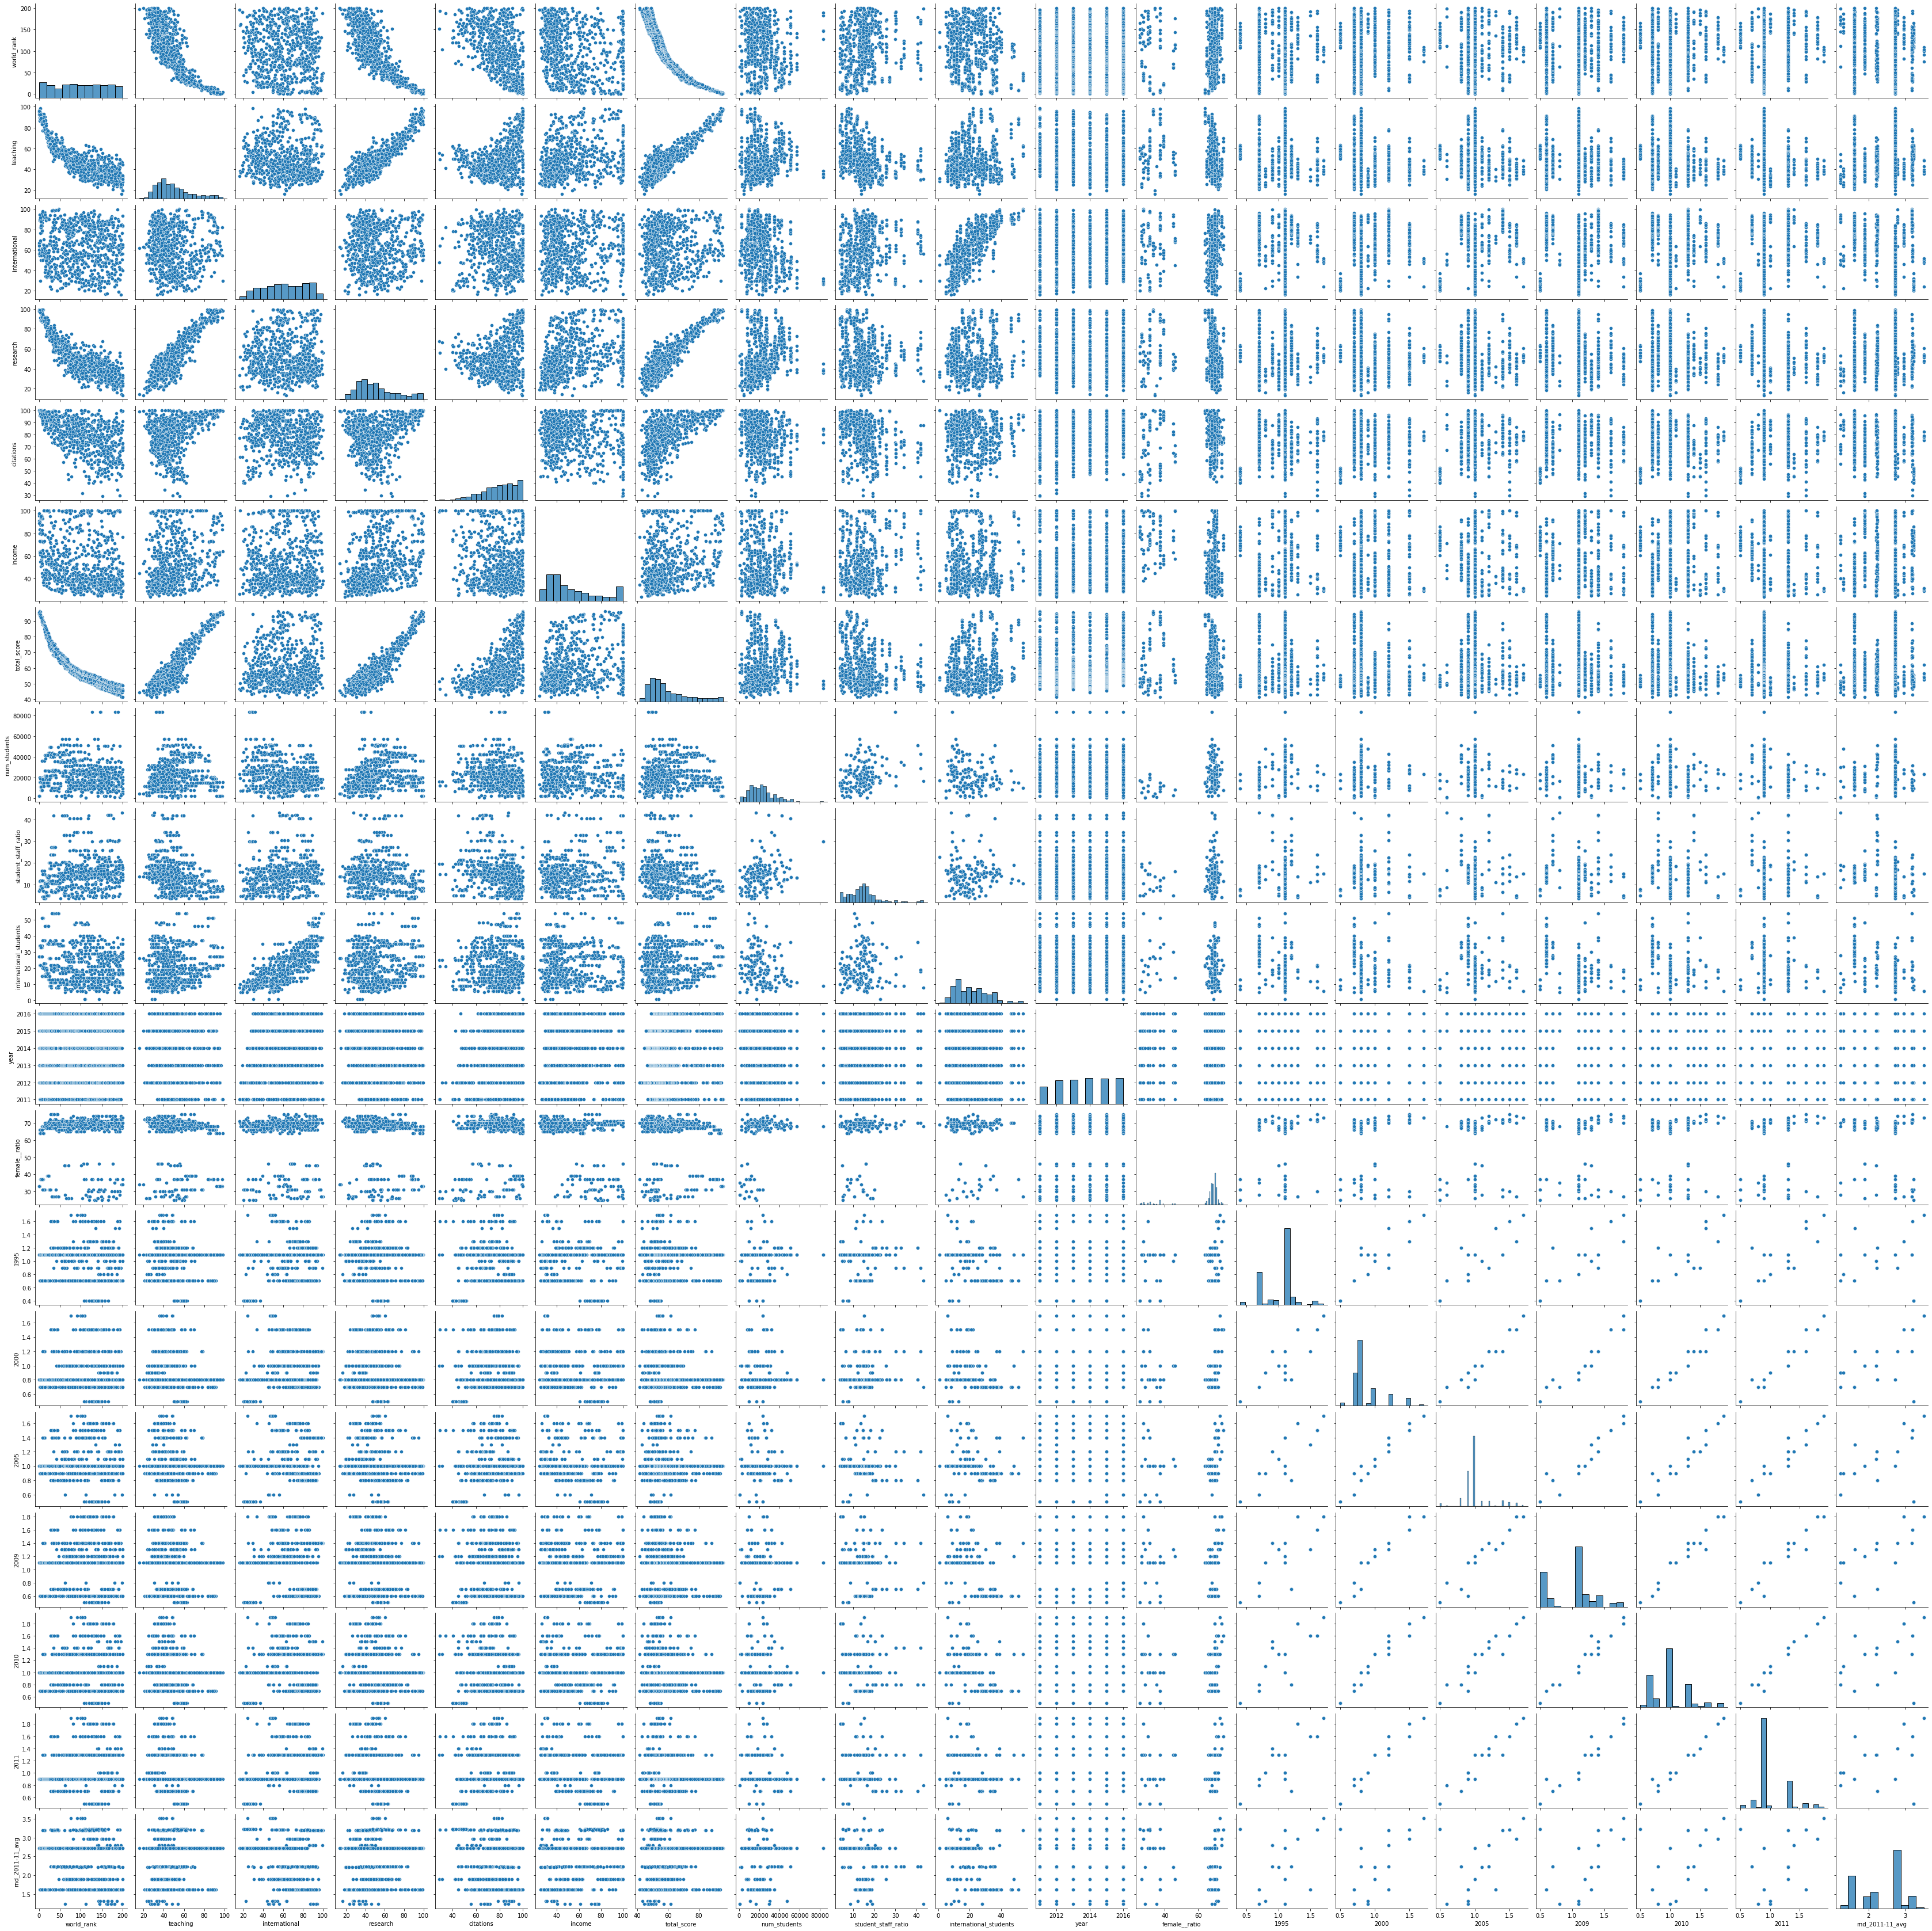

In [121]:
import seaborn as sns
sns.pairplot(df_final)

In [93]:
import plotly.figure_factory as ff

data = df_final.loc[:,["research","international", "total_score"]] 
data["index"] = np.arange(1,len(data)+1)

fig = ff.create_scatterplotmatrix(data, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

In [119]:
trace1 = go.Scatter3d(
    x=df_final.world_rank,
    y=df_final.research,
    z=df_final.citations,
    mode='markers',
    text=df_final.university_name,
    marker=dict(
        size=5,
        color=df_final.index,
        colorscale='Viridis',))

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0))

fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene = dict(
                    
                     xaxis = dict(
                         title="world rank",
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        title="research",
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        title="citation",
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",)
                    
                 
                 ),
                 title={
                        'text':'world rank,research,citation',
                        'y':0.9,
                        'x':0.5,
                        'xanchor': 'left',
                        'yanchor': 'top' })
iplot(fig)

In [97]:
# prepare data frame
df = df_final.iloc[:100,:]

import plotly.graph_objs as go

#Trace1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines+markers",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)
#Trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)
data = [trace1, trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'percent',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [105]:
df_final2016 = df_final[df_final.year == 2016].iloc[:20,:]
pie1 = df_final2016.num_students
pie1_list = [str(each).replace(':',' ') for each in df_final2016.num_students]

trace1=go.Bar(x=df_final2016.university_name,
                  y=pie1_list ,
                  name="Number of student",
                  marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                  text = df_final2016.num_students,
                  )
data=[trace1]
layout=dict(title="Number of student",
           xaxis=dict(title="-"),
           yaxis=dict(title="-"),
           )

fig = dict(data = data, layout = layout)
iplot(fig)


In [117]:
# prepare data
x2011 = df_final.student_staff_ratio[df_final.year == 2011]
x2012 = df_final.student_staff_ratio[df_final.year == 2012]
x2013 = df_final.student_staff_ratio[df_final.year == 2013]
x2014 = df_final.student_staff_ratio[df_final.year == 2014]
x2015 = df_final.student_staff_ratio[df_final.year == 2015]
x2016 = df_final.student_staff_ratio[df_final.year == 2016]

trace1 = go.Histogram(
    x=x2016,
    opacity=0.75,
    name = "2016",
    marker=dict(color='rgba(255,255,255,1)'))
trace2 = go.Histogram(
    x=x2015,
    opacity=0.75,
    name = "2015",
    marker=dict(color='rgba(173,216,230,1)'))
trace6 = go.Histogram(
    x=x2014,
    opacity=0.75,
    name = "2014",
    marker=dict(color='rgba(211,211,211,1)'))
trace3 = go.Histogram(
    x=x2013,
    opacity=0.75,
    name = "2013",
    marker=dict(color='rgba(144,238,144,1)'))
trace5 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace4 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))
data = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(
    title={
        'text':'Students-staff ratio year by year',
        'y':0.9,
        'x':0.5,
        'xanchor': 'left',
        'yanchor': 'top' },          
    barmode='overlay',  
    xaxis=dict(title='students-staff ratio'),
    yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

(7.2, 0.8)

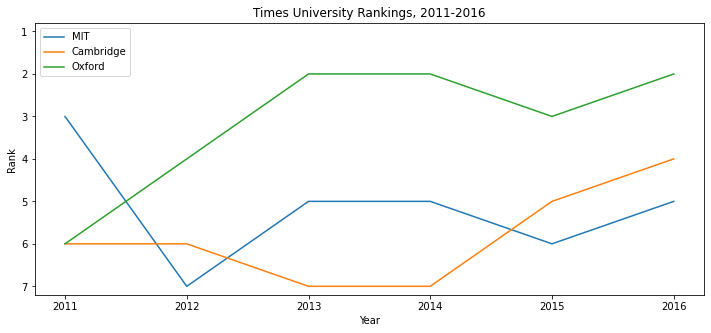

In [123]:
from matplotlib import pyplot as plt
# Preprocess data for plotting
harvard=df_final[df_final.university_name=='Harvard University']
mit=df_final[df_final.university_name=='Massachusetts Institute of Technology']
cambridge=df_final[df_final.university_name=='University of Cambridge']
oxford=df_final[df_final.university_name=='University of Oxford']

harvard.loc[:,'world_rank'] = harvard.loc[:,'world_rank'].astype(float)
mit.loc[:,'world_rank'] = mit.loc[:,'world_rank'].astype(float)
cambridge.loc[:,'world_rank'] = cambridge.loc[:,'world_rank'].astype(float)
oxford.loc[:,'world_rank'] = oxford.loc[:,'world_rank'].astype(float)

plt.figure(figsize=(12,5))

# Lineplot, one for each selected uni
sns.lineplot(x='year', y='world_rank', data=harvard, label='Harvard')
sns.lineplot(x='year', y='world_rank', data=mit, label='MIT')
sns.lineplot(x='year', y='world_rank', data=cambridge, label='Cambridge')
sns.lineplot(x='year', y='world_rank', data=oxford, label='Oxford')

# Aesthetics
plt.title('Times University Rankings, 2011-2016')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.ylim(7.2,0.8)